# Community

Here we show an example of the package applied to a community of 

In [1]:
from ncmw.utils import get_models
from ncmw.community import ShuttleCommunityModel, compute_fair_weights
models = get_models(folder="snm3_models", prefix="results/default_project_name/setup/")
model = ShuttleCommunityModel(models)

In [2]:
from ncmw.visualization import plot_pairwise_growth_relation_per_weight, plot_community_interaction

## Pairwise community interaction

Here we plot the growth of each model, given the weight $\alpha$. This shows e.g. at which weight the community is balanced between two species.

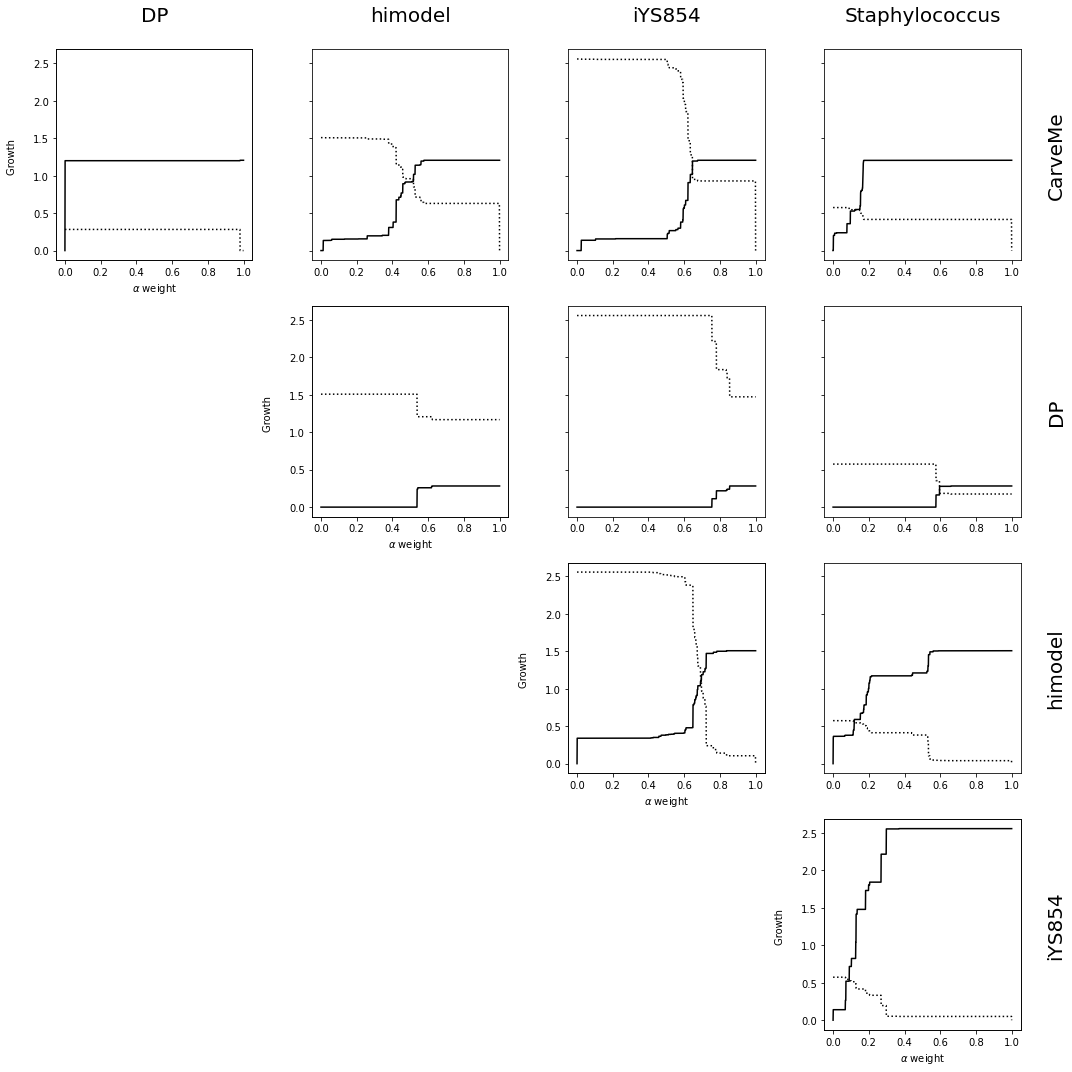

In [9]:
_ = plot_pairwise_growth_relation_per_weight(model)

## Community interaction

Here we plot the internal exchanges between the community members.

Objective:  2.9587696357643565
CarveMe_SNM_gapfilled_model_consistent_snm3 :  0.14547049040300394  with weights  1
DP_83VPs_KB5_consistent_snm3 :  0.0  with weights  1
himodel_consistent_snm3 :  0.3687171645760669  with weights  1
iYS854_consistent_snm3 :  2.4196099377488944  with weights  1
Staphylococcus_epidermidis_ATCC_12228_consistent_snm3 :  0.024972043036391476  with weights  1


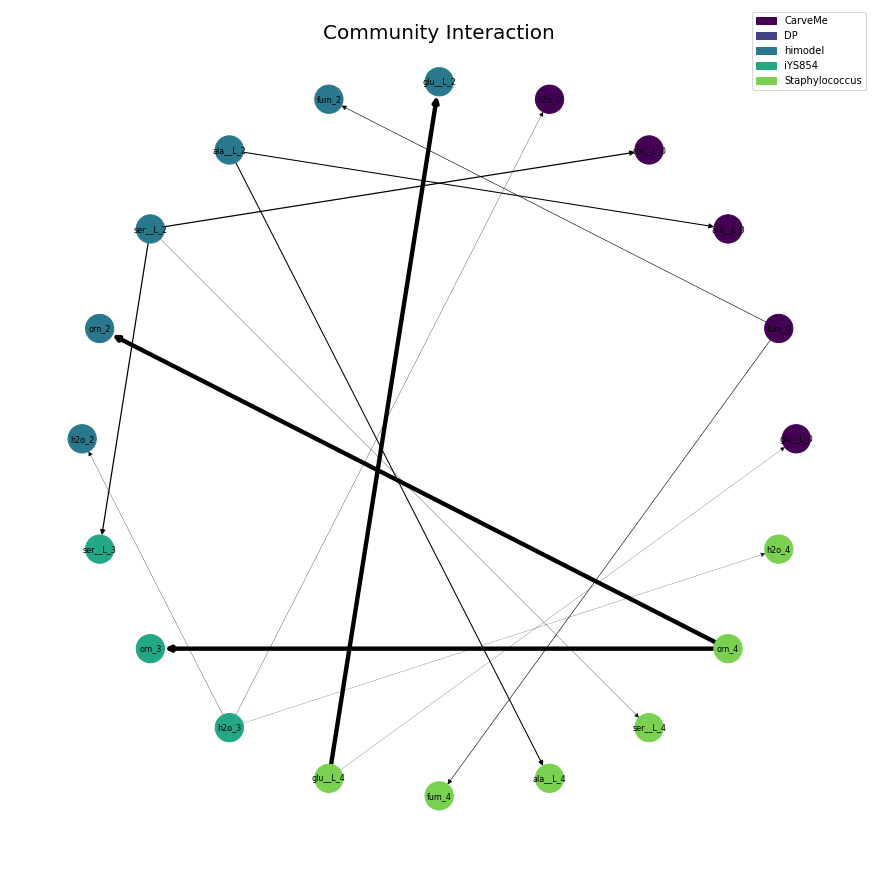

In [3]:
model.weights = [1,1,1,1,1]
fig = plot_community_interaction(model, model.summary())

Objective:  1.8356359450016522
CarveMe_SNM_gapfilled_model_consistent_snm3 :  0.2549307902589595  with weights  0.8032604302822428
DP_83VPs_KB5_consistent_snm3 :  0.0  with weights  0.9539395570587306
himodel_consistent_snm3 :  0.34155885701521704  with weights  0.7539184518449563
iYS854_consistent_snm3 :  2.3095135310137773  with weights  0.5826166721373109
Staphylococcus_epidermidis_ATCC_12228_consistent_snm3 :  0.030665996976275083  with weights  0.9062648886767593


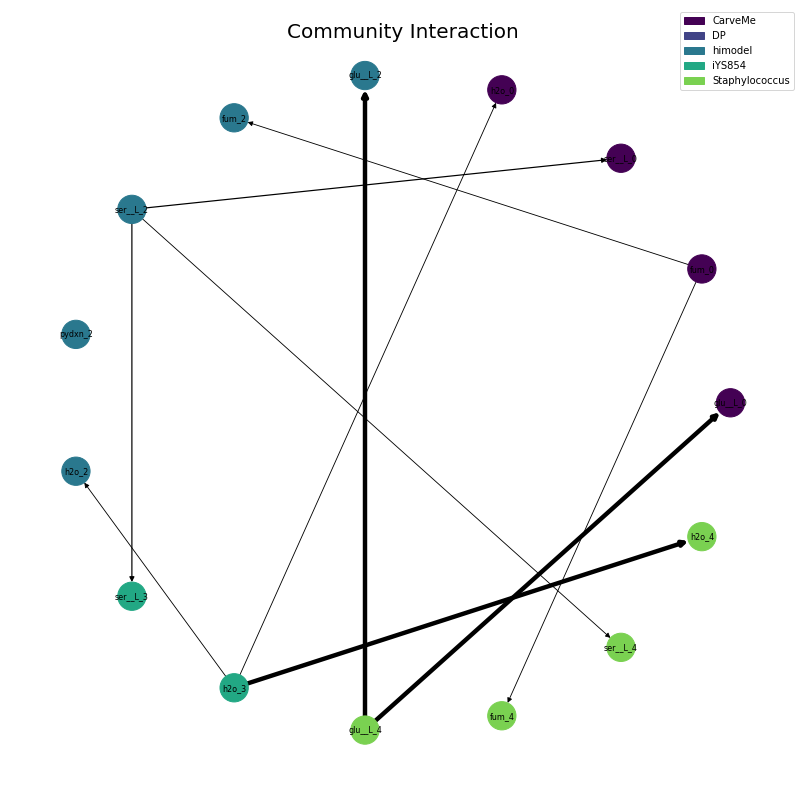

In [4]:
model.weights = compute_fair_weights(model)
fig = plot_community_interaction(model, model.summary())

The COOPM (cooperation inducing medium) is made such that all members in the community survive with atleast 10 % of their maximum growth rate. But also tries to minimize the number of metabolites within the medium. This induces a large number of cooperations, within the community as we see here:

Optimization Status:  OptimizationStatus.OPTIMAL
Objective:  0.6191273497193766
CarveMe_SNM_gapfilled_model_consistent_snm3 :  0.2764899888111911  with weights  0.8032604302822428
DP_83VPs_KB5_consistent_snm3 :  0.1456580281189971  with weights  0.9539395570587306
himodel_consistent_snm3 :  0.0  with weights  0.7539184518449563
iYS854_consistent_snm3 :  0.0  with weights  0.5826166721373109
Staphylococcus_epidermidis_ATCC_12228_consistent_snm3 :  0.2847786896931571  with weights  0.9062648886767593


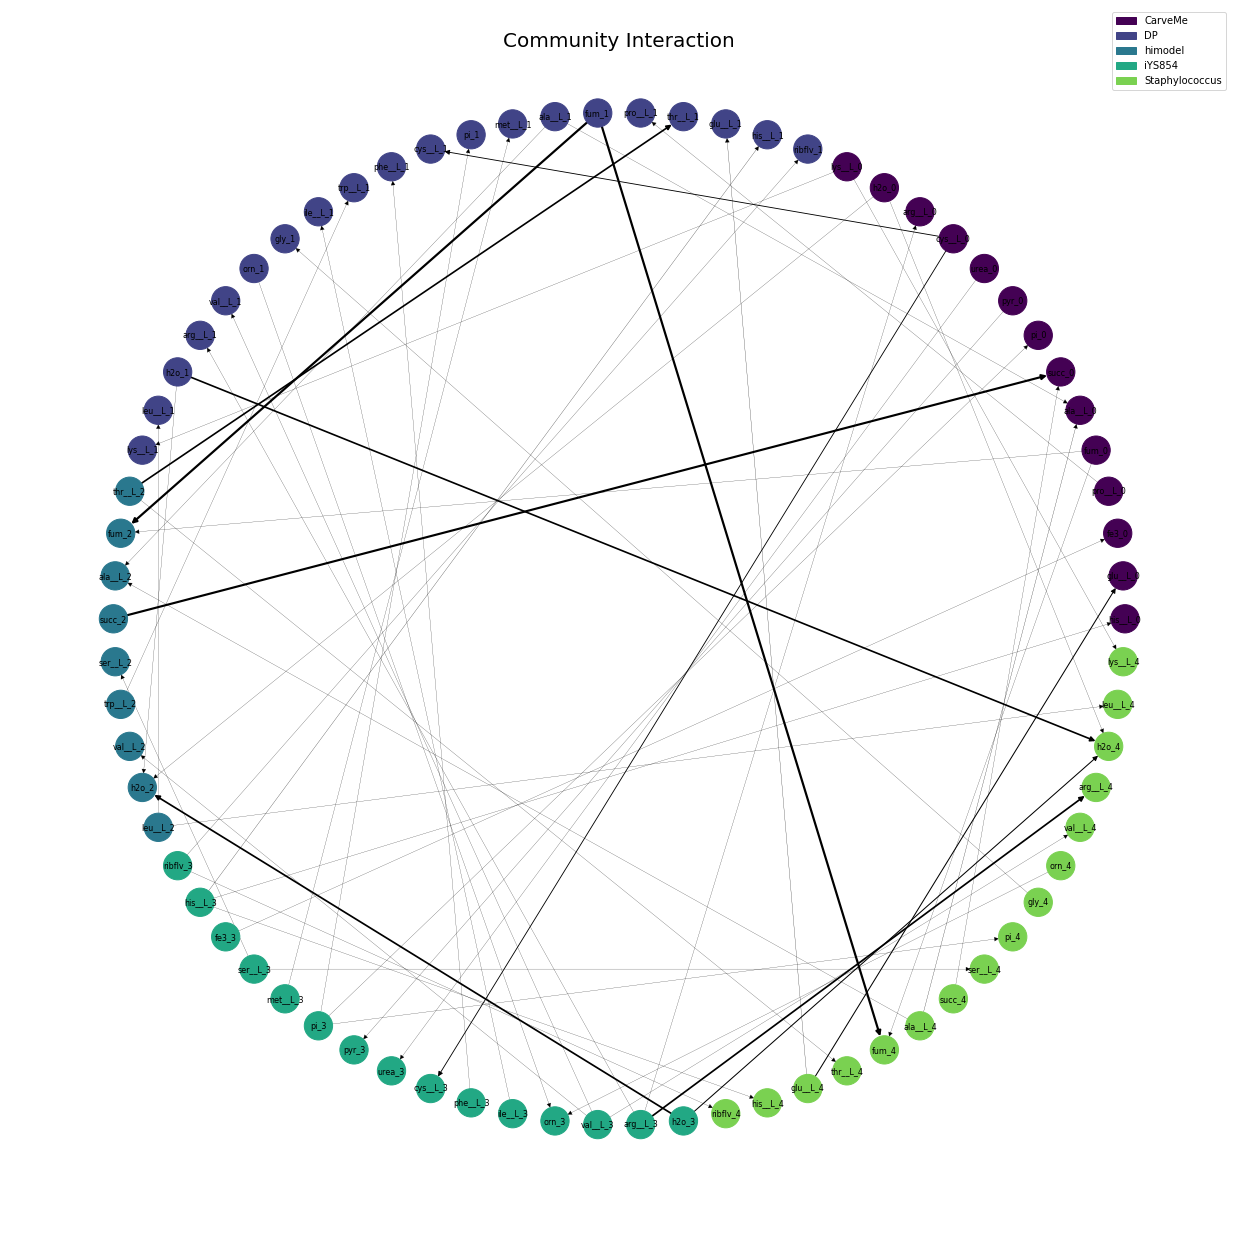

In [5]:
coopm = model.computeCOOPM(model.slim_optimize())
model.medium = coopm 
fig = plot_community_interaction(model, model.summary())